# Предварительная обработка данных

Сейчас подробно посмотрим на полученные датафреймы по вечному фьючерсу на сбербанк и обыкновенной акции сбербанка за 21.02.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from xml.etree import ElementTree as ET
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sberbank_stock_SBER_primary = pd.read_csv('/content/sberbank_stock_SBER_primary')
sberbank_futures_SRH5_primary = pd.read_csv('//content/sberbank_futures_SRH5_primary')


# Анализ датафреймов

Сначала посмотрим, все ли нормально с временем, то есть совпадают ли миинутки в обоих датафреймах

In [ ]:
sberbank_futures_SRH5_primary.head(5)


,Unnamed: 0,open,close,high,low,value,volume,begin,end
0,0,32040,32040,32040,32040,0,6,2025-02-21 08:59:00,2025-02-21 08:59:59
1,1,32036,32040,32047,32010,0,616,2025-02-21 09:00:00,2025-02-21 09:00:59
2,2,32039,32067,32069,32034,0,345,2025-02-21 09:01:00,2025-02-21 09:01:59
3,3,32066,32063,32073,32057,0,161,2025-02-21 09:02:00,2025-02-21 09:02:59
4,4,32059,32068,32070,32053,0,278,2025-02-21 09:03:00,2025-02-21 09:03:59


In [ ]:
sberbank_stock_SBER_primary.head(5)

,Unnamed: 0,open,close,high,low,value,volume,begin,end
0,0,315.48,315.48,315.48,315.48,435362.4,1380,2025-02-21 06:59:00,2025-02-21 06:59:59
1,1,315.48,315.40,315.52,315.15,4582481.4,14530,2025-02-21 07:00:00,2025-02-21 07:00:59
2,2,315.45,315.27,315.45,315.20,819856.7,2600,2025-02-21 07:01:00,2025-02-21 07:01:59
3,3,315.37,315.43,315.45,315.28,1769461.8,5610,2025-02-21 07:02:00,2025-02-21 07:02:59
4,4,315.45,315.90,315.90,315.45,19943170.3,63180,2025-02-21 07:03:00,2025-02-21 07:03:59


Очевидно, что в колонках begin и end разные числа. Во первых, торговые сессии начинаются в разное время. Во вторых, на срочном рынке есть 2 клиринговые сессии в течении дня. Давайте исключим этим различия, чтобы у нас были датафреймы с одними и теми же промежутками времени.

Наглядно как съехали наши данные b c чем мы хотим бороться:

<Axes: ylabel='open'>

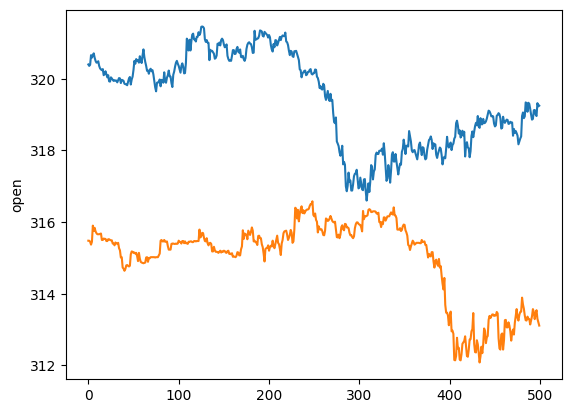

In [ ]:
sns.lineplot(data = (sberbank_futures_SRH5_primary['open'] / 100))
sns.lineplot(data = (sberbank_stock_SBER_primary['open']))

Делается это максимально просто через функцию слияния датафреймов. Складываем мы их по колонке 'begin', чтобы в итоговом датафрейме остались только минуты, когда торговались оба инструмента.

In [ ]:
df = pd.merge(sberbank_futures_SRH5_primary, sberbank_stock_SBER_primary, how='inner', on='begin')

df.head(5)

,Unnamed: 0_x,open_x,close_x,high_x,low_x,value_x,volume_x,begin,end_x,Unnamed: 0_y,open_y,close_y,high_y,low_y,value_y,volume_y,end_y
0,0,32040,32040,32040,32040,0,6,2025-02-21 08:59:00,2025-02-21 08:59:59,120,315.47,315.46,315.47,315.44,1668833.6,5290,2025-02-21 08:59:59
1,1,32036,32040,32047,32010,0,616,2025-02-21 09:00:00,2025-02-21 09:00:59,121,315.47,315.47,315.47,315.21,19027040.5,60340,2025-02-21 09:00:59
2,2,32039,32067,32069,32034,0,345,2025-02-21 09:01:00,2025-02-21 09:01:59,122,315.47,315.79,315.79,315.46,17485809.4,55420,2025-02-21 09:01:59
3,3,32066,32063,32073,32057,0,161,2025-02-21 09:02:00,2025-02-21 09:02:59,123,315.79,315.57,315.79,315.57,6919809.1,21920,2025-02-21 09:02:59
4,4,32059,32068,32070,32053,0,278,2025-02-21 09:03:00,2025-02-21 09:03:59,124,315.57,315.61,315.70,315.57,2985710.0,9460,2025-02-21 09:03:59


Сделаем косметический ремонт этого ужаса

In [ ]:
df = df.set_index('begin')
df.head()

,Unnamed: 0_x,open_x,close_x,high_x,low_x,value_x,volume_x,end_x,Unnamed: 0_y,open_y,close_y,high_y,low_y,value_y,volume_y,end_y
begin,,,,,,,,,,,,,,,,
2025-02-21 08:59:00,0,32040,32040,32040,32040,0,6,2025-02-21 08:59:59,120,315.47,315.46,315.47,315.44,1668833.6,5290,2025-02-21 08:59:59
2025-02-21 09:00:00,1,32036,32040,32047,32010,0,616,2025-02-21 09:00:59,121,315.47,315.47,315.47,315.21,19027040.5,60340,2025-02-21 09:00:59
2025-02-21 09:01:00,2,32039,32067,32069,32034,0,345,2025-02-21 09:01:59,122,315.47,315.79,315.79,315.46,17485809.4,55420,2025-02-21 09:01:59
2025-02-21 09:02:00,3,32066,32063,32073,32057,0,161,2025-02-21 09:02:59,123,315.79,315.57,315.79,315.57,6919809.1,21920,2025-02-21 09:02:59
2025-02-21 09:03:00,4,32059,32068,32070,32053,0,278,2025-02-21 09:03:59,124,315.57,315.61,315.70,315.57,2985710.0,9460,2025-02-21 09:03:59


In [ ]:
df = df.drop(['Unnamed: 0_x', 'value_x', 'end_x', 'Unnamed: 0_y', 'value_y', 'end_y', 'volume_x', 'volume_y'], axis=1)
df.head()

,open_x,close_x,high_x,low_x,open_y,close_y,high_y,low_y
begin,,,,,,,,
2025-02-21 08:59:00,32040,32040,32040,32040,315.47,315.46,315.47,315.44
2025-02-21 09:00:00,32036,32040,32047,32010,315.47,315.47,315.47,315.21
2025-02-21 09:01:00,32039,32067,32069,32034,315.47,315.79,315.79,315.46
2025-02-21 09:02:00,32066,32063,32073,32057,315.79,315.57,315.79,315.57
2025-02-21 09:03:00,32059,32068,32070,32053,315.57,315.61,315.70,315.57


<Axes: xlabel='begin', ylabel='open_x'>

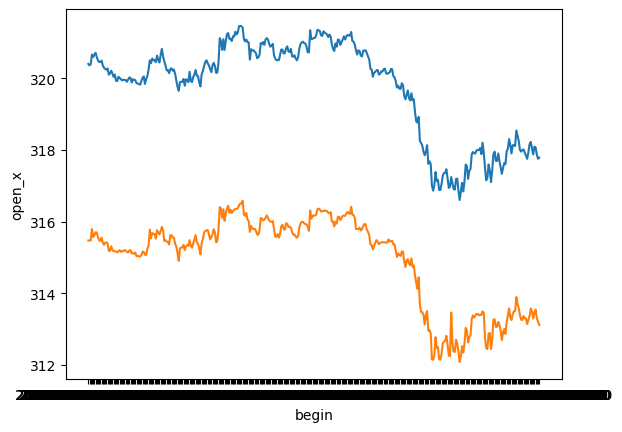

In [41]:
sns.lineplot(data = (df['open_x'] / 100))
sns.lineplot(data = (df['open_y']))

"Съезд" ликивдирован. Теперь давайте посмотрим на объект исследования - разницу в цене этих инструментов.

<Axes: xlabel='begin'>

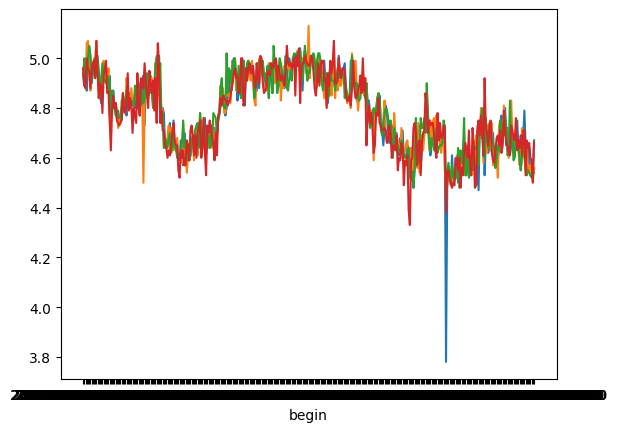

In [43]:
sns.lineplot(data = ((df['open_x'] / 100) - (df['open_y'])))
sns.lineplot(data = ((df['close_x'] / 100) - (df['close_y'])))
sns.lineplot(data = ((df['high_x'] / 100) - (df['high_y'])))
sns.lineplot(data = ((df['low_x'] / 100) - (df['low_y'])))

График немного шакальный, но мы видим главное - сильные отклонения, на которых мы и хотим зарабатывать.

<img src="https://i.postimg.cc/nrNRnbjQ/image.png" height="200">




